# logistic_regression

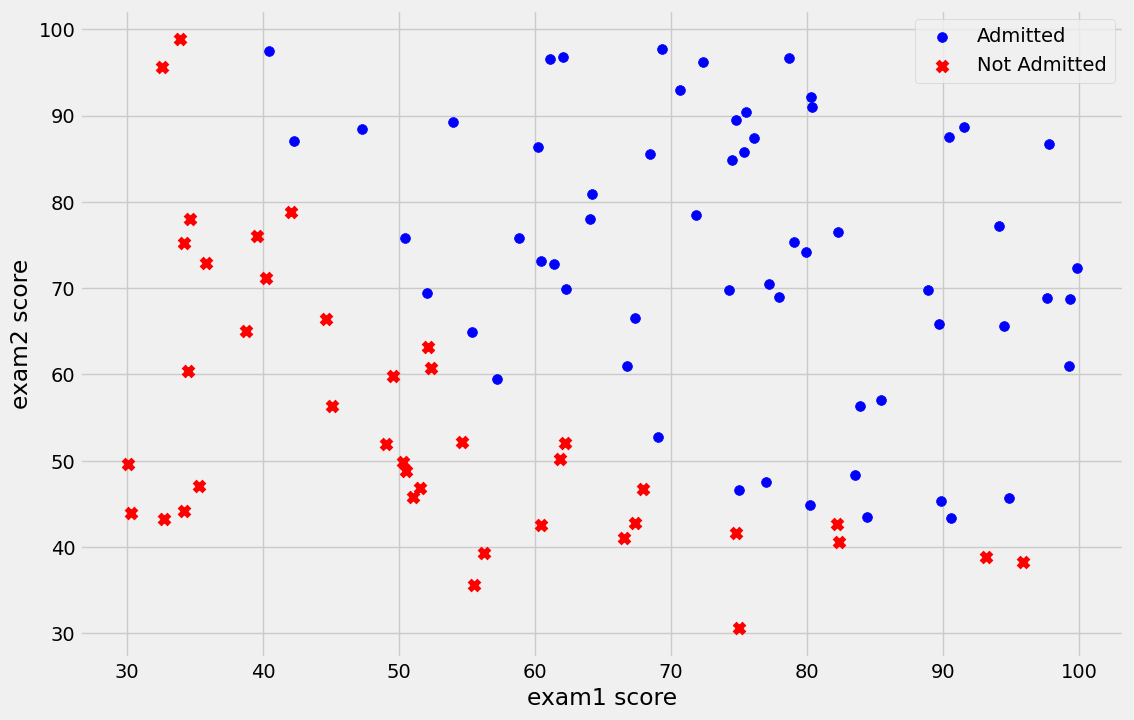

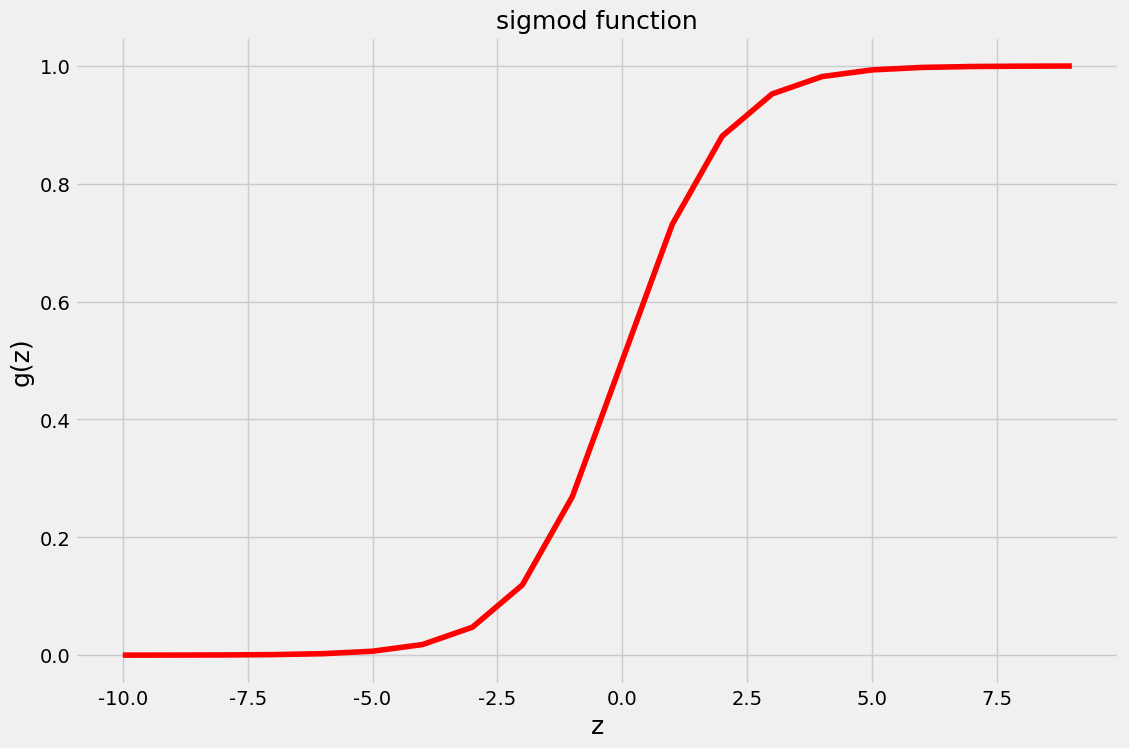

accuracy = 89%


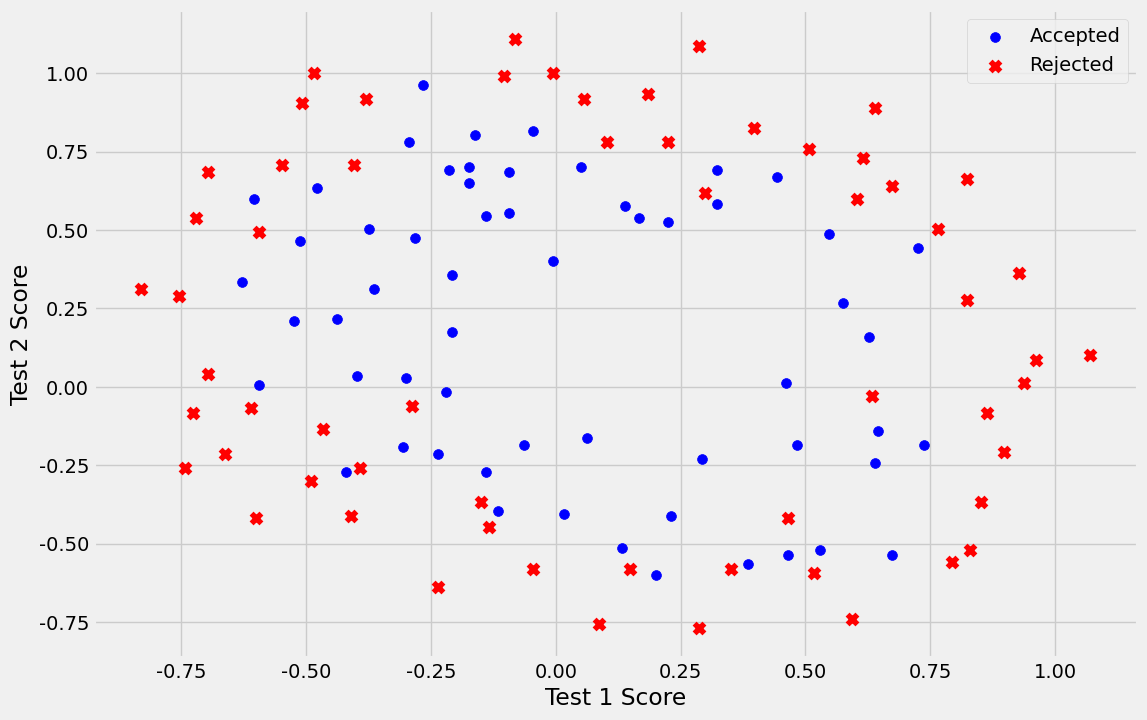

(118, 28)
(118, 28)
(118,)


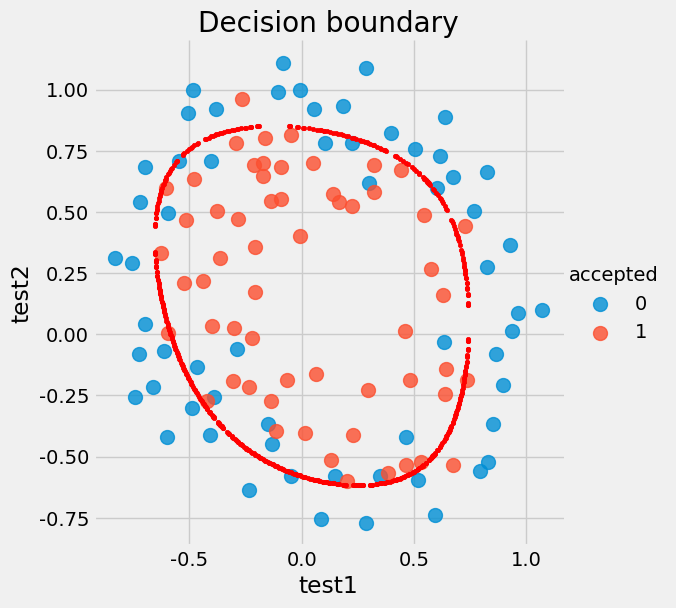

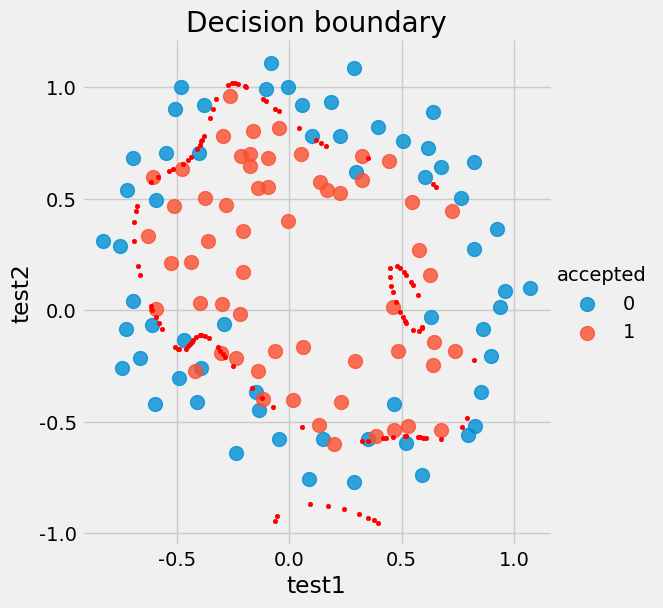

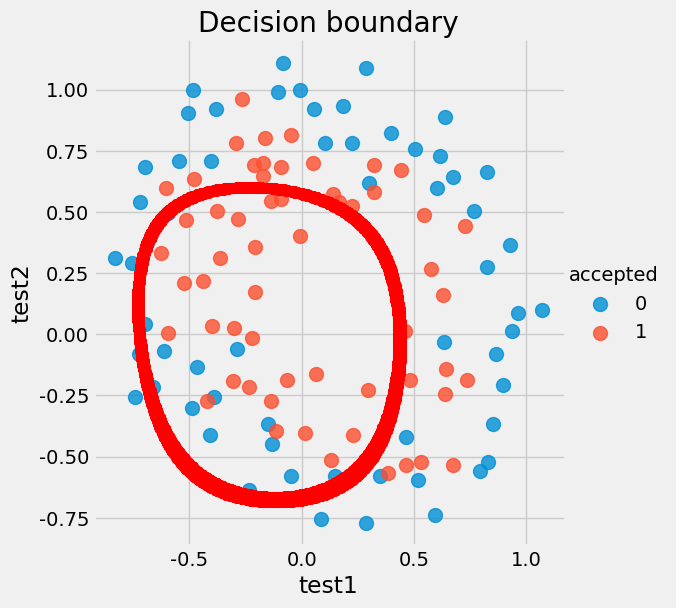

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
#plt.rcParams.update(plt.rcParamsDefault)  # 恢复默认配置
# 设置一个通用的、大多数系统都有的字体
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Bitstream Vera Sans']
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
from sklearn.metrics import classification_report

path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['exam1', 'exam2', 'admitted'])
#print(data.head())
#print(data.describe())

positive = data[data['admitted'].isin([1])]
negative = data[data['admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel("exam1 score")
ax.set_ylabel("exam2 score")
plt.show()

def get_X(df):
    ones = pd.DataFrame({'ones' : np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)

    return data.iloc[:, :-1].values

def get_y(df):
    return np.array(df.iloc[:, -1])

def normalize_feture(df):
    return df.apply(lambda column: (column - column.means()) / column.std())

X = get_X(data)
#print(X.shape)

y = get_y(data)
#print(y.shape)

def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))

# 使用num 进行sigmod检验
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmoid(nums), 'r')
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmod function', fontsize=18)
plt.show()

def cost(theta, X, y):
    return np.mean( -y * np.log(sigmoid(X @theta)) - (1 - y) * np.log( 1 - sigmoid( X @ theta)))

theta = np.zeros(3)
#theta

#X.shape, theta.shape, y.shape

#cost(theta, X, y)

# Gradient的实现，利用的是循环的方法
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y).T
    #print("X.shape = ", X.shape)
    #print("y.shape = ", y.shape)
    #print("theta.shape = ", theta.shape)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X @ theta.T) - y
    #print("error.shape = ", error.shape)
    
    for i in range(parameters):
        term = (X[:,i].T @ error).sum()
        grad[i] = term / len(X)

    return grad
    
gradient(theta, X, y)

import scipy.optimize as opt
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)
#print(res)

cost(res.x, X, y)

def predict(theta, X):
    probability = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = res.x
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))
#print(classification_report(y, predictions))

data2 = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
data2.head()

positive = data2[data2['accepted'].isin([1])]
negative = data2[data2['accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['test1'], positive['test2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['test1'], negative['test2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

def feature_mapping(x, y, power, as_ndarray=False):
#     """return mapped features as ndarray or dataframe"""
    # data = {}
    # # inclusive
    # for i in np.arange(power + 1):
    #     for p in np.arange(i + 1):
    #         data["f{}{}".format(i - p, p)] = np.power(x, i - p) * np.power(y, p)

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)


degree = 5
x1 = np.array(data2.test1)
x2 = np.array(data2.test2)

data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

theta = np.zeros(data.shape[1])
X = feature_mapping(x1, x2, power=6, as_ndarray=True)
print(X.shape)

y = get_y(data2)
print(y.shape)



def regularized_cost(theta, X, y, l=1):
#     '''you don't penalize theta_0'''
    theta_j1_to_n = theta[1:]
    regularized_term = (l / (2 * len(X))) * np.power(theta_j1_to_n, 2).sum()

    return cost(theta, X, y) + regularized_term
#正则化代价函数

regularized_cost(theta, X, y, l=1)


def regularized_gradient(theta, X, y, l=1):
#     '''still, leave theta_0 alone'''
    theta_j1_to_n = theta[1:]
    regularized_theta = (l / len(X)) * theta_j1_to_n

    # by doing this, no offset is on theta_0
    regularized_term = np.concatenate([np.array([0]), regularized_theta])

    return gradient(theta, X, y) + regularized_term

regularized_gradient(theta, X, y)

learningRate = 1

#print('init cost = {}'.format(regularized_cost(theta, X, y)))

res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, y), method='Newton-CG', jac=regularized_gradient)
res

final_theta = res.x
y_pred = predict(final_theta, X)

#print(classification_report(y, y_pred))

#from sklearn import linear_model#调用sklearn的线性回归包
#model = linear_model.LogisticRegression(penalty='l2', C=1.0)
#model.fit(X2, y2.ravel())


import seaborn as sns
def draw_boundary(power, l):
#     """
#     power: polynomial power for mapped feature
#     l: lambda constant
#     """
    density = 1000
    threshhold = 2 * 10**-3

    final_theta = feature_mapped_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)

    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    #sns.lmplot('test1', 'test2', hue='accepted', data=df, size=6, fit_reg=False, scatter_kws={"s": 100})
    sns.lmplot(x='test1', y='test2', hue='accepted', data=df,
           height=6, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='r', s=10)
    plt.title('Decision boundary')
    plt.show()

def feature_mapped_logistic_regression(power, l):
#     """for drawing purpose only.. not a well generealize logistic regression
#     power: int
#         raise x1, x2 to polynomial power
#     l: int
#         lambda constant for regularization term
#     """
    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_y(df)

    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])

    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=regularized_gradient)
    final_theta = res.x

    return final_theta

def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe

    inner_product = mapped_cord.values @ theta

    decision = mapped_cord[np.abs(inner_product) < threshhold]

    return decision.f10, decision.f01
#寻找决策边界函数

draw_boundary(power=6, l=1)#lambda=1

draw_boundary(power=6, l=0)  # no regularization, over fitting，#lambda=0,没有正则化，过拟合了

draw_boundary(power=6, l=100)  # underfitting，#lambda=100,欠拟合